# Convolutional Neural Network Project


## Image classification of parasitized vs uninfected cells


Data is downloaded from [1] and originally published in [2], with an updated version in [3].

[1] NIH Website, accessed August, 24 2021: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

[2] Rajaraman S, Antani SK, Poostchi M, Silamut K, Hossain MA, Maude RJ, Jaeger S, Thoma GR. 2018. Pre-trained convolutional neural networks as feature extractors toward improved malaria parasite detection in thin blood smear images. PeerJ 6:e4568 https://doi.org/10.7717/peerj.4568

[3] Rajaraman S, Jaeger S, Antani SK. 2019. Performance evaluation of deep neural ensembles toward malaria parasite detection in thin-blood smear images. PeerJ 7:e6977 https://doi.org/10.7717/peerj.6977

## Overview

**Objective**

In this project I will use a convolutional neural network (CNN) as a model for predicting whether or not images of red blood cells (RBCs) from the dataset are parasitized i.e. containing the *P. falciparum* parasite, or uninfected, containing no parasite. 

**Background**

The *P. falciparum* is a deadly parasite which is known to cause malaria in humans through insect bites from *Anopheles* mosquitos in 50% of the reported cases world wide. Once the parasite invades the RBCs of its host, malaria symptoms will manifest, and it is within these cells that pathologists will identify its presence and give a diagnosis.

**Introduction**

The ability to supplement the pathologists diagnosis with machine learning models has become a highly discussed option in the recent years [4]. While individuals are prone to commit errors in diagostics, machine learning has the potential to aide, but not fully replace humans at this time. Whereas machine learning can offer guidance, the results of a given model must be taken with care as the models built can inherantly contain errors due to data collection, encoding, and interpretation by the scientists at each stage.

The data used for this project is comprised of 27560 images pre-sorted in to two classes, Class 0) Parasitized, and Class 1) Uninfected, with an **equal** distribution of images between both classes. 

Typically, one can use cross-validation for randomly selecting a subset of the data and tuning the hyperparameters based on the performance average, so called cross-validation [5]. Because our data set is large enough, we will do three splits instead of the most common k-fold cross-validation. The data is randomly divided between three sets in order to best ensure our test data is not revealed until after training is performed [6]. We have the **train data** a set of 16536 images, the **test data** a set of 5512 images and the **validation data** a set with 5512 images. Each of the data sets are divided in their respective folders of parasitized and uninfected. 

In order to evaluate our model I will look at accuracy (reliable when we have a balanced data set) and the Matthew's correlation coefficient, an added measure of model performance[7] as well as model runtime which includes CPU and system runtime not the wall time.

I will show in the following steps that, 1) given balanced classes, 2) a sufficient number of images distributed equally in each of the data sets, and 3) proper tuning of hyperparameters, there is a high potential to build a CNN which will yield both relevant and trustworthy results. The main hurdle of our performance will then be limited by quality the input data and the initial classification accuracy. 

[4] Cui, M., Zhang, D.Y. Artificial intelligence and computational pathology. Lab Invest 101, 412–422 (2021). https://doi.org/10.1038/s41374-020-00514-0

[5] https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right

[6] Chicco, D. Ten quick tips for machine learning in computational biology. BioData Mining 10, 35 (2017). https://doi.org/10.1186/s13040-017-0155-3

[7] Chicco, Davide et al. “The Matthews correlation coefficient (MCC) is more reliable than balanced accuracy, bookmaker informedness, and markedness in two-class confusion matrix evaluation.” BioData mining vol. 14,1 13. 4 (2021). doi:10.1186/s13040-021-00244-z

## Data Visualisation

Imports, file directories and libraries

In [1]:
#Import Libraries for mathematical operations and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

#import for fast image sorting 
import splitfolders

#track execution time
import time

In [2]:
#Using this command we can split the data into the output folder in the ratios required.

#splitfolders.ratio("cell_images", output="output", seed=1337, ratio=(.6, .2, .2), group_prefix=None) 

In [3]:
import os
#assign dir
data_dir = '/Users/limn-mel/Documents/Python_files/MDSP_2021/Malaria_CNN/output'


In [4]:
#check dir
os.listdir(data_dir)

['test', 'train', 'val']

In [5]:
#Set file path
test_path = data_dir + '/test'
train_path = data_dir + '/train'
val_path = data_dir + '/val'

In [6]:
#Confirm path
print(test_path)
print(train_path)
print(val_path)

/Users/limn-mel/Documents/Python_files/MDSP_2021/Malaria_CNN/output/test
/Users/limn-mel/Documents/Python_files/MDSP_2021/Malaria_CNN/output/train
/Users/limn-mel/Documents/Python_files/MDSP_2021/Malaria_CNN/output/val


In [7]:
#Folder for test image data contains parasitized and unifected folders.
print(os.listdir(test_path))
print(os.listdir(train_path))
print(os.listdir(val_path))

['parasitized', 'uninfected']
['parasitized', 'uninfected']
['parasitized', 'uninfected']


In [8]:
#Look inside parasitized folder
#os.listdir(train_path + '/parasitized')

#os.listdir(test_path + '/parasitized')

In [9]:
#List an image for each folder.
print(os.listdir(test_path + '/parasitized')[10])

print(os.listdir(train_path + '/parasitized')[10])

print(os.listdir(val_path + '/parasitized')[10])

C64P25N_ThinF_IMG_20150818_153401_cell_194.png
C116P77ThinF_IMG_20150930_171844_cell_100.png
C50P11thinF_IMG_20150724_115651_cell_190.png


In [10]:
#Assign path to single image above.
para_cell_test = test_path + '/parasitized/' + 'C64P25N_ThinF_IMG_20150818_153401_cell_194.png'

para_cell_train = train_path + '/parasitized/' + 'C116P77ThinF_IMG_20150930_171844_cell_100.png'

para_cell_val = val_path + '/parasitized/' + 'C50P11thinF_IMG_20150724_115651_cell_190.png'

In [11]:
#Confirm path to image.
print(para_cell_test)

print(para_cell_train)

print(para_cell_val)

/Users/limn-mel/Documents/Python_files/MDSP_2021/Malaria_CNN/output/test/parasitized/C64P25N_ThinF_IMG_20150818_153401_cell_194.png
/Users/limn-mel/Documents/Python_files/MDSP_2021/Malaria_CNN/output/train/parasitized/C116P77ThinF_IMG_20150930_171844_cell_100.png
/Users/limn-mel/Documents/Python_files/MDSP_2021/Malaria_CNN/output/val/parasitized/C50P11thinF_IMG_20150724_115651_cell_190.png


In [12]:
#Imread to display image as an array.
para_cell_test = imread(para_cell_test)
#print(para_cell_test)

para_cell_train = imread(para_cell_train)
#print(para_cell_train)

para_cell_val = imread(para_cell_val)
#print(para_cell_val)

In [13]:
#Look at shape of image. -> Color image: E.g. x = 112 px, y = 109 px, with 3 color channel (RGB). 
print(para_cell_test.shape)

print(para_cell_train.shape)

print(para_cell_val.shape)

(112, 109, 3)
(133, 124, 3)
(127, 130, 3)


Text(0.5, 1.0, 'Parasitized_val')

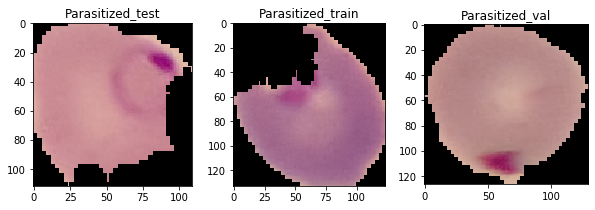

In [14]:
#Display image of infected cell from test dataset.
fig=plt.figure(figsize=(10,3))
fig.add_subplot(1,3,1)
plt.imshow(para_cell_test)
plt.title('Parasitized_test')

fig.add_subplot(1,3,2)
plt.imshow(para_cell_train)
plt.title('Parasitized_train')

fig.add_subplot(1,3,3)
plt.imshow(para_cell_val)
plt.title('Parasitized_val')
#Note: Dark spots or rings forming. Also note irregularities in cell shape.


In [15]:
#Select path to image of uninfected cells in test, train and validation data.
print(os.listdir(test_path + '/uninfected')[10])

print(os.listdir(train_path + '/uninfected')[10])

print(os.listdir(val_path + '/uninfected')[10])

C217ThinF_IMG_20151106_141500_cell_133.png
C170P131ThinF_IMG_20151119_120233_cell_183.png
C160P121ThinF_IMG_20151116_093109_cell_29.png


In [16]:
#Assign path to images.
uninfected_cell_test = test_path + '/uninfected/' + 'C217ThinF_IMG_20151106_141500_cell_133.png'

uninfected_cell_train = train_path + '/uninfected/' + 'C170P131ThinF_IMG_20151119_120233_cell_183.png'

uninfected_cell_val = val_path + '/uninfected/' + 'C160P121ThinF_IMG_20151116_093109_cell_29.png'

#Display path for each image.
print(uninfected_cell_test, '\n', uninfected_cell_train, '\n', uninfected_cell_val)

/Users/limn-mel/Documents/Python_files/MDSP_2021/Malaria_CNN/output/test/uninfected/C217ThinF_IMG_20151106_141500_cell_133.png 
 /Users/limn-mel/Documents/Python_files/MDSP_2021/Malaria_CNN/output/train/uninfected/C170P131ThinF_IMG_20151119_120233_cell_183.png 
 /Users/limn-mel/Documents/Python_files/MDSP_2021/Malaria_CNN/output/val/uninfected/C160P121ThinF_IMG_20151116_093109_cell_29.png


In [17]:
#Use imread to read image data.
uninfected_cell_test = imread(uninfected_cell_test)

uninfected_cell_train = imread(uninfected_cell_train)

uninfected_cell_val = imread(uninfected_cell_val)

Text(0.5, 1.0, 'Uninfected_val')

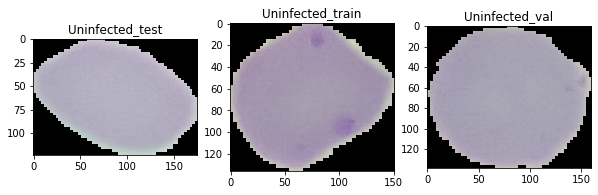

In [18]:
#Display image of uninfected cell from test dataset.
fig=plt.figure(figsize=(10,3))
fig.add_subplot(1,3,1)
plt.imshow(uninfected_cell_test)
plt.title('Uninfected_test')

fig.add_subplot(1,3,2)
plt.imshow(uninfected_cell_train)
plt.title('Uninfected_train')

fig.add_subplot(1,3,3)
plt.imshow(uninfected_cell_val)
plt.title('Uninfected_val')
#Note: no darkening in cell.
#-->Uninfected_train example image looks a bit suspicious. Let's evaluate it later.

Note: The sample image from the uninfected training data set looks contains spots which may be a result of cell staining. We can come back to this image after our model is built and investigate further.

Next, we can verify the number images in the respective directories. 

In [19]:
len(os.listdir(test_path + '/parasitized'))

2756

In [20]:
len(os.listdir(train_path + '/parasitized'))

8268

In [21]:
len(os.listdir(val_path + '/parasitized'))

2756

In [22]:
len(os.listdir(test_path + '/uninfected'))

2756

In [23]:
len(os.listdir(train_path + '/uninfected'))

8268

In [24]:
len(os.listdir(val_path + '/uninfected'))

2756

### Cell dimensions

Images contain differences in their shape, but carry the same dimension in RGB color channel, i.e. all three channels are represented.

In order to see the distribution of the different image sizes in x and y we can visualize with a joint plot in seaborn. 

In [25]:
#We first set up our empty array for our test data of uninfected cells.
dim_test_ux = [] #Dimension: test data uninfected cell image, length in x.
dim_test_uy = [] #Dimension: test data uninfected cell image, length in y.

#Loop through images in our test data uninfected folder and add image depth in x and y to our separate arrays.
for image_filename in os.listdir(test_path + '/uninfected'):
    
    img1 = imread(test_path + '/uninfected/' + image_filename)
    d1,d2,colors = img1.shape
    dim_test_ux.append(d1)
    dim_test_uy.append(d2)
    

In [26]:
#dim_test_ux

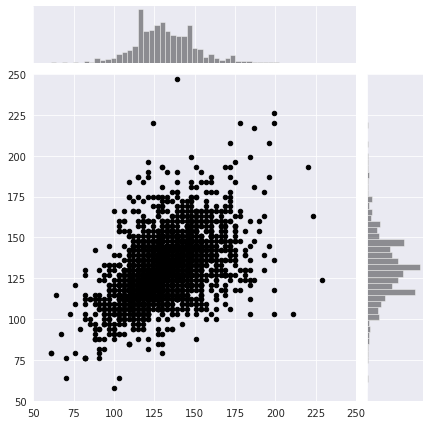

In [27]:
#Create a jointplot to display the spread of the data in x and y for the image sizes. 
with sns.axes_style(style="darkgrid"):
    ax = sns.jointplot(dim_test_ux,dim_test_uy, s=20, color='k')
    ax.ax_marg_x.set_xlim(50, 250)
    ax.ax_marg_y.set_ylim(50, 250)

### Size selection
In order to train the model, we need to use the same dimensions for each of the images. To select which size is ideal, we can simply take the mean of the x and y dimensions of the data set. We will look at each group between parasitized and uninfected for test data set. 

In [28]:
#We first set up our empty array for our test data of parasitized cells.
dim_test_px = [] #Dimension: test data parasitized cell image, length in x.
dim_test_py = [] #Dimension: test data parasitized cell image, length in y.

#Loop through images in our test data parasitized folder and add image depth in x and y to our separate arrays.
for image_filename in os.listdir(test_path + '/parasitized'):
    
    img2 = imread(test_path + '/parasitized/' + image_filename)
    d3,d4,colors = img2.shape
    dim_test_px.append(d3)
    dim_test_py.append(d4)

Now we can look at the mean for x and y in the uninfected test set

In [29]:
dim_sum = pd.DataFrame({
    'test_uninfected_x': np.mean(dim_test_ux),
    'test_uninfected_y': np.mean(dim_test_uy),
    'test_parasitized_x': np.mean(dim_test_px),
    'test_parasitized_y': np.mean(dim_test_py),},
    index=['Mean']) 

display(dim_sum.round(decimals = 2))

,test_uninfected_x,test_uninfected_y,test_parasitized_x,test_parasitized_y
Mean,131.11,130.91,134.56,133.86


It looks like our mean is quite close to 130 px in x and y, therefore we can choose this as our dimension.

In [30]:
image_shape = (130,130,3)

## Data Preparation

Due to the size of the data, we will use Keras to automatically process the data and generate a flow of batches from our directory and to manipulate our images. 

### Image Manipulation

In order to increase the validity of the model we can use image augmentation, in the form of rotations and shifts, resizing, shearing for example. This will increase the robustness of the model, allowing it to better classify new images which are introduced in the future. We will use the ImageDataGenerator to do this. 

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
#Image generator: for circular RBCs in 2D we can be flexible in our manipulations.
image_gen = ImageDataGenerator(rescale=1/255, #rescale the images in case there are any which are outside the range intended (0-1).
                               rotation_range = 20, #rotate the image 20°
                               width_shift_range = 0.1, #shift the image width by a max of 10%
                               height_shift_range = 0.1, #shift the image width by a max of 10%
                               shear_range = 0.1, #shearing will cut away part of the image
                               zoom_range = 0.1, #zoom in by max 10%
                               horizontal_flip = True, #allow flip horizontally
                               vertical_flip = True, #depending on the object vertical flip can be used. because we have cells  which have no fixed orientation, it is ok to use. 
                               fill_mode = 'constant') #fill in missing pixels with the constant value 'k' unless otherwise stated.


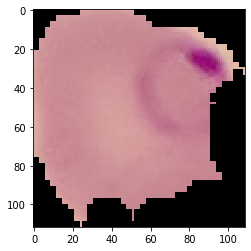

In [33]:
#Recall the parasitized test cell example.
plt.imshow(para_cell_test)

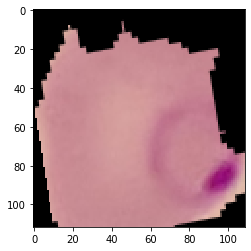

In [34]:
#Perform a random transformation on the cell.
plt.imshow(image_gen.random_transform(para_cell_test))

Files are organized from each class in two separate folders, i.e. parasitized and uninfected, flow_from_directory is used to access the files in a very succinct way in order to fit the model.


In [35]:
image_gen.flow_from_directory(train_path)

Found 16534 images belonging to 2 classes.


## Creating the Model

In [36]:
#Import layers and sequential model for build.
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization

**Model description**

A common neural network used for feature extraction in image analysis is the Convolutional Neural Network (CNN). This network is more suitable for image classification where images are non-standardized. The network is not fully connected and instead uses local connectivity to form information which is then passed onto a subset of the neurons in the next layer in the form of filters. Here the Convolutional 2D (Conv2D) class is used. Afterwards, dense layers are added to connect the network fully and produce an output classification.

Start by first instantiating the model. 

The Conv2D layers will apply multiple image filters to the input 'training' images. After which, the CNN can determine which weights are best for applying to the kernal in order to make predictions on new test images.

Next, Conv2D layers are added with the following inputs. 

* Filters = 32, 64 and 128.  As the spatial volume in the images decreases, the number of filters can be increased in order to gain more information on patterns/features in the images. Filters are increased by powers of 2 until the final output layer. Highly complex images will require more filters, images are quite simple, thus 32 is as a good start.

* Kernal_size = (3,3) a kernal size proportional to the image size is used, where the kernal represents the number of pixels processed simultaneously. This is to enlarge spatial filters and reduce volume size.

* Strides = (1,1) which is the default. For large images, it is wise to choose larger stride values.

* Padding = "valid", the default, which does not add padding to the images as the kernal is passed. Using the other option 'same' ensures that the output image size is the same as the input image as the kernal is moved across the image, i.e. applies padding as needed. 

* Activation function = relu. The rectified linear unit is selected to avoid problems with back propagation in terms of saturation. Here values below 0 are returned as 0. While values above 0 are returned as their original value.

After the Conv2D layer, max pooling (MaxPool2D) is used to reduce dimentionality and return the max value of each of the input areas sampled in the images. Areas are determined by the pool_size, where (2,2) is the default.

Then, a Flatten layer is used which transforms the tensor into a vector in order to satisfy the required input for the next input layer.

Next, a fully connected Dense layer is introduced, such that all of the neurons are connected to those in the previous layer. **128 neurons** is chosen for the base model v0.0, while 256 neurons is chosen for v0.3. Again relu is selected for the activation function. 

Note: The network was evaluated with No Dropout, No Batch Normalization, Dropout only, Batch Normalization only and both Dropout and Batch Normalization to arrive at the best performing model. [8] Batch Normalization was tested only after MaxPooling layers. In the control or base model, neither dropout nor batch normalization was used.

A dropout layer can be included after the dense layer, allowing only a percentage of the neurons to be active at a given time.  Dropout was tested only after the dense layer. The values of 0.25, 0.5 and 0.75 were chosen in order remove a percentage of the neurons from our network, saving time and reducing overfitting the model. One to two dense layers have been tested.

Next, the last Dense layer is added with the sigmoid activation function, which returns the output in probabilities from 0-1 for the likelyhood of an image corresponding to the given class. Here one neuron is assigned because it is a binary classification problem.

Finally, the model is compiled according to the classification type. Binary crossentropy loss function is chosen because there are two classes and the expected answer is True or False for whether or not a given image belongs to a given class. 

The Adam optimizer, which is generally recognized at having very high performance in image classification tasks for CNNs, is used to ensure that the loss function is minimized. When initialized, the model will start with a set of weights in order to make predictions, and the error of these predictions is calculated. Using gradient decent, the algorithm will update the weights at each iteration of the model to reduce the error, thus the optimizer navigates the gradient of error [9].

The default value is chosen for learning rate (0.001) - a parameter which determines the size of the steps taken in gradient decent. Variations in the learning rate hyper parameter were tested under the base model without Batch Normalization or Dropout, in order to ensure the best approximation for the critical hyperparameter was chosen. 

The performance metric of accuracy is used because the classes are balanced, i.e. equal number of images for each class. 

The variants are listed here:

* v0.0 - base model with 128 neurons in the fully connected dense layer (see below in example model run).

* v0.3 - same as base model, but with 256 neurons in the dense layer.

* v1.1 - Dense = 128 neurons, with 25% Dropout after the dense layer.

* v1.4 - Dense = 256 neurons, with 25% Dropout after the dense layer. 

* v3.1 - batch size = 32 instead of 16 as in the original base model.

See Results and Conclusions for further discussion.

[8] Garbin, C., Zhu, X. & Marques, O. Dropout vs. batch normalization: an empirical study of their impact to deep learning. Multimed Tools Appl 79, 12777–12815 (2020). https://doi.org/10.1007/s11042-019-08453-9

[9] S. Ruder. An overview of gradient descent optimization algorithms. arXiv preprint arXiv:1609.04747 (2016). https://arxiv.org/abs/1609.04747

In [37]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2))) 

model.add(Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2))) 

model.add(Conv2D(filters=128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(1,activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
#Obtain a summary of the model parameters.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

In [39]:
#Import callbacks for monitoring overfitting.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [40]:
#Use early stopping to avoid overfitting. Model checkpoint can be used to save the model for later use.
early_stop = [EarlyStopping(monitor='val_loss',patience=2), ModelCheckpoint("checkpoint.h5", save_best_only=True)]

### Batch size
The batch size was tested at 8, 16, 32, 128 and 256. Of these reasonable performance was seen only for 16 and 32. A summary of these results are discussed in Results section. 

In [41]:
batch_size=16

### Image augmentation
Image augmentation is used with the ImageDataGenerator from Keras, in order to increase the robustness of the model. With each pass of the batch of images, i.e. at each epoch, the images are randomly transformed. These images are then fed into the neural network, but not stored back in the original data set. Thus the original data set is not fed "as is" to the network, only randomly transformed versions of the set. class_mode = 'binary' is used, as there only 2 classes.

Further discussion on ImageDataGenerator: https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/

Image_gen shuffling of data is True by default, so that there is a well distributed training dataset, i.e. removing bias. The test dataset does not need to be shuffled because this is used to perform inference, so the sequence of data input does not affect the outcome.

In [42]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary') 

Found 16534 images belonging to 2 classes.


In [43]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle=False) 

Found 5512 images belonging to 2 classes.


In [44]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary') 

Found 5512 images belonging to 2 classes.


In [45]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

## Model Training

Here, the model is fit in batches of the augmented training images, validated with augmented validation images and halted with early stopping to avoid overfitting. The number of epochs limited to 20. 

In order to monitor the total time for training (CPU and wall time), the %%time command is used. 

In [46]:
%%time
#Note, can also use .fit in updated Keras documentation.
results = model.fit(train_image_gen,epochs=20,
                             validation_data=val_image_gen,
                             callbacks=early_stop)

Train for 1034 steps, validate for 345 steps
Epoch 1/20
1034/1034 [==============================] - 550s 532ms/step - loss: 0.4250 - accuracy: 0.8108 - val_loss: 0.2304 - val_accuracy: 0.9231
Epoch 2/20
1034/1034 [==============================] - 449s 434ms/step - loss: 0.2129 - accuracy: 0.9344 - val_loss: 0.1729 - val_accuracy: 0.9447
Epoch 3/20
1034/1034 [==============================] - 444s 430ms/step - loss: 0.1801 - accuracy: 0.9425 - val_loss: 0.1770 - val_accuracy: 0.9503
Epoch 4/20
1034/1034 [==============================] - 442s 427ms/step - loss: 0.1614 - accuracy: 0.9485 - val_loss: 0.1662 - val_accuracy: 0.9512
Epoch 5/20
1034/1034 [==============================] - 441s 426ms/step - loss: 0.1586 - accuracy: 0.9488 - val_loss: 0.1497 - val_accuracy: 0.9550
Epoch 6/20
1034/1034 [==============================] - 435s 421ms/step - loss: 0.1521 - accuracy: 0.9503 - val_loss: 0.1466 - val_accuracy: 0.9554
Epoch 7/20
1034/1034 [==============================] - 436s 422ms/

## Model Evaluation

The evaluation of the model is first checked in terms of loss and accuracy over the epochs trained. Here, the loss from training data and validation data is expected to coincide with one another as well as the accuracy of the training data and the validation data. 

In [47]:
evaluation = pd.DataFrame(model.history.history)

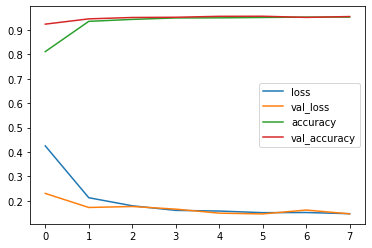

In [48]:

evaluation[["loss","val_loss",'accuracy','val_accuracy']].plot()

In [49]:
model.metrics_names

['loss', 'accuracy']

In [50]:
%%time
evaluation = model.evaluate(val_image_gen)
#Model accuracy is around 94.9%

345/345 [==============================] - 53s 152ms/step - loss: 0.1402 - accuracy: 0.9563
CPU times: user 1min 46s, sys: 4.81 s, total: 1min 50s
Wall time: 52.8 s


## Model Predictions

After evaluation of training, the model can be used to make predictions. Here, the augmented test data set (previously unseen) is used for predictions. 

With model.predict a numpy array of probabilities for each image in the test image data set is generated. Values are between 0-1. We can instead use boolean values in the array by selecting those values above 0.5 as True and below 0.5 as False in order to pass them more easily into the classification report and confusion matrix. All values which are True will belong to the uninfected class 1, while those with the value of False will belong to the parasitized class 0.

Depending on the type of data evaluated, the cutoff for True and False can be adjusted. However, due to the fact that the classification is binary, the output for the two data sets is inversely proportional. Meaning, if the threshold is quite low, there is an increase in the likelihood of a higher number of false negatives, thus decreasing the precision in the parasitized cells, while simultaneously increasing the precision of predictions made on the uninfected cells. Overall accuracy will then decrease. 

The threshold should be determined by a professional with domain knowledge in the type of disease present in the cells, i.g. a parasitologist, in this case. For this study, the threashold is set at 50%.

In [51]:
%%time
predictions = model.predict(test_image_gen)

CPU times: user 1min 46s, sys: 5.16 s, total: 1min 51s
Wall time: 54.9 s


In [52]:
predictions 

array([[4.5686960e-05],
       [6.1205626e-03],
       [7.6740980e-05],
       ...,
       [8.9823699e-01],
       [9.7160923e-01],
       [9.8828191e-01]], dtype=float32)

In [53]:
predictions = predictions >0.5

In [54]:
#Check first 10 predictions. False in this case means that the prediction was less than 0.5, that a cell was infected (parasitized).
predictions[:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [55]:
#Check first 10 predictions from 2756-2766, where we expect the class to switch. True in this case means that the value for prediction is over 0.5 and that the cell will belong to the uninfected class. 
predictions[2756:2766]

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Model Performance

### Classification report and confusion matrix

Now we can import the packages for evaluating the model performance.

The confusion matrix gives the results for predictions from which the classification report is calculated. 

In the confusion matrix, the results are listed as TP - true positives, FP - false positives, FN - false negatives, and TN - true negatives. 

The classification report outputs the values for precision, recall, and f1-score for each class and a combined accuracy. Precision, recall, f1-score and accuracy are calculated according to the following formulations. Note: The formulations for class 1 are the inverse of class 0, where TP is replaced by TN and FP and FN are replaced by FN and FP respectively.

$\text{Precision_class_0}$ = $\frac{TP}{(TP + FP)}$


$\text{Recall_class_0}$ = $\frac{TP}{(TP + FN)}$


$\text{F1-score_class_0}$ = $\frac{2*TP}{(2*TP + FP + FN)}$


$\text{Accuracy}$ = $\frac{TP + TN}{TP + TN + FP + FN}$


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
confusion_matrix(test_image_gen.classes,predictions)

array([[2576,  180],
       [  81, 2675]])

In [58]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2756
           1       0.94      0.97      0.95      2756

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512



## Image predictions

Next we can use our model to predict on an image and verify whether or not it can correctly predict the class. From the above results, we should have a precision, accuracy, and recall of around 95% for both classes, which is quite good.

In [59]:
from tensorflow.keras.preprocessing import image

Because we do not have any new images, we can use some of our test images  to verify that the model is working. We start with images from the uninfected test folder, then with parasitized folder.

In [60]:
images_u = os.listdir(test_path + '/uninfected')
print(images_u[:10])

['C230ThinF_IMG_20151112_150647_cell_1.png', 'C182P143NThinF_IMG_20151201_171950_cell_93.png', 'C1_thinF_IMG_20150604_104919_cell_96.png', 'C58P19thinF_IMG_20150802_122338_cell_86.png', 'C109P70ThinF_IMG_20150930_102944_cell_138.png', 'C170P131ThinF_IMG_20151119_120150_cell_85.png', 'C146P107ThinF_IMG_20151018_140044_cell_71.png', 'C182P143NThinF_IMG_20151201_171836_cell_122.png', 'C189P150ThinF_IMG_20151203_141615_cell_56.png', 'C162P123ThinF_IMG_20151116_102655_cell_138.png']


In [61]:
#Selecting paths for uninfected cells to check predictions.
unin_predictions = []
for i in images_u[:10]:
    unin_predictions.append(test_path + '/uninfected/' + i)
#unin_predictions

In [62]:
#Resize the image to match those used in the model.
new_images_u = []
for i in unin_predictions:
    new_images_u.append(image.load_img(i,target_size=image_shape))
#new_images_u

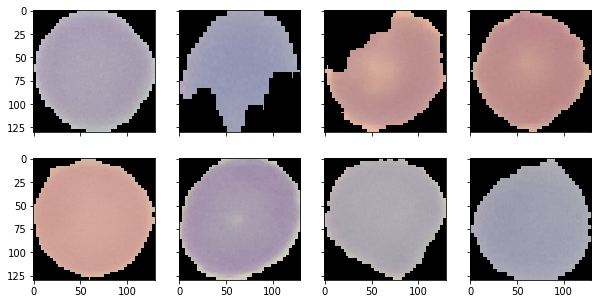

In [63]:
#Display images of uninfected cells from test dataset.
fig, axs = plt.subplots(2, 4, figsize=(10,5), sharex='col', sharey='row')
axs[0, 0].imshow(new_images_u[0])
axs[0, 1].imshow(new_images_u[1])
axs[0, 2].imshow(new_images_u[2])
axs[0, 3].imshow(new_images_u[3])
axs[1, 0].imshow(new_images_u[4])
axs[1, 1].imshow(new_images_u[5])
axs[1, 2].imshow(new_images_u[6])
axs[1, 3].imshow(new_images_u[7])

#Note: We do not see darkening in the form of dots, commas or ring-like structures in the 
#cells which typically indicate infection.

In [64]:
#Convert images to an array
new_array_u = []
for i in new_images_u:
    new_array_u.append(image.img_to_array(i))


In [65]:
#Verify that the image has the correct dimensions before feeding it to our model.
new_array_u[0].shape

(130, 130, 3)

In [66]:
#Add indexing to images
new_array_u_expand = []
for i in new_array_u:
    new_array_u_expand.append(np.expand_dims(i, axis = 0))

In [67]:
#Verify expansion
new_array_u_expand[0].shape

(1, 130, 130, 3)

In [68]:
#Use model to get predictions on the "new" images from the list.
new_predictions_u = []
for i in new_array_u_expand:
    new_predictions_u.append(model.predict(i))
new_predictions_u

[array([[1.]], dtype=float32),
 array([[0.9995807]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32)]

In [69]:
#Verify image classes.
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

Thus we can see that the model is predicting correctly the class for the first 10 images of the uninfected cells in the original test data set. 

Now paracitized cell images will be checked with model predictions.

In [70]:
images_p = os.listdir(test_path + '/parasitized')
print(images_p[:10])

['C144P105ThinF_IMG_20151015_163432_cell_310.png', 'C109P70ThinF_IMG_20150930_103811_cell_159.png', 'C48P9thinF_IMG_20150721_160406_cell_247.png', 'C116P77ThinF_IMG_20150930_171844_cell_114.png', 'C171P132ThinF_IMG_20151119_153150_cell_222.png', 'C175P136NThinF_IMG_20151127_141325_cell_219.png', 'C184P145ThinF_IMG_20151203_102721_cell_1.png', 'C182P143NThinF_IMG_20151201_172057_cell_143.png', 'C81P42ThinF_IMG_20150817_120351_cell_190.png', 'C81P42ThinF_IMG_20150817_120351_cell_184.png']


In [71]:
#Selecting paths for parasitized cells to check predictions.
para_predictions = []
for i in images_p[:10]:
    para_predictions.append(test_path + '/parasitized/' + i)
#para_predictions

In [72]:
#Resize the images to match those used in the model.
new_images_p = []
for i in para_predictions:
    new_images_p.append(image.load_img(i,target_size=image_shape))
#new_images

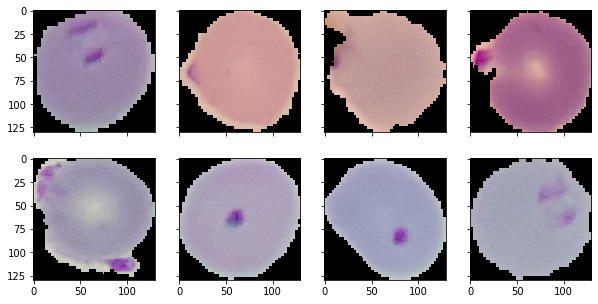

In [73]:
#Display images of parasitized cells from test dataset.

fig, axs = plt.subplots(2, 4, figsize=(10,5), sharex='col', sharey='row')
axs[0, 0].imshow(new_images_p[0])
axs[0, 1].imshow(new_images_p[1])
axs[0, 2].imshow(new_images_p[2])
axs[0, 3].imshow(new_images_p[3])
axs[1, 0].imshow(new_images_p[4])
axs[1, 1].imshow(new_images_p[5])
axs[1, 2].imshow(new_images_p[6])
axs[1, 3].imshow(new_images_p[7])

#Note: darkening in the form of dots, commas or ring-like structures in the cells.

In [75]:
#Convert images to an array
new_array_p = []
for i in new_images_p:
    new_array_p.append(image.img_to_array(i))


In [76]:
#Verify that the image has the correct dimensions before feeding it to the model.
new_array_p[0].shape

(130, 130, 3)

In [81]:
#Add indexing to images
new_array_p_expand = []
for i in new_array_p:
    new_array_p_expand.append(np.expand_dims(i, axis = 0))


In [82]:
#Verify expansion
new_array_p_expand[0].shape

(1, 130, 130, 3)

In [83]:
#Use the model to get predictions on the "new" images in the list.
new_predictions_p = []
for i in new_array_p_expand:
    new_predictions_p.append(model.predict(i))
new_predictions_p

[array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32)]

Thus we can see that the model is predicting correctly the class for the first 10 images of parasitized cells in the original test data set. 

## Classification validity

Here I have used data which was previously classified by pathologists and further segmented to extract individual cells published by Rajaraman et. al 2018 [2]. In a random selection of images from the training dataset of uninfected cells, we saw that one image seemed to contain spots which resembled infected cells. We can feed this image to our model in order to see what the classification will be. 

In [84]:
#Image found to contain suspected infection.
#print(os.listdir(train_path + '/uninfected')[10])

uninfected_cell_train = train_path + '/uninfected/' + 'C170P131ThinF_IMG_20151119_120233_cell_183.png'


In [85]:
#Resize to fit our model input.
uninfected_train = image.load_img(uninfected_cell_train,target_size=image_shape)

In [86]:
#convert to array
uninfected_train = image.img_to_array(uninfected_train)

In [87]:
#resize along the axis = 0
uninfected_train = np.expand_dims(uninfected_train, axis = 0)

In [88]:
#Predict with our model.
model.predict(uninfected_train)


array([[0.]], dtype=float32)

The model predicts this image to belong to the class of parasitized cells. Interestingly, we note that the authors point out that 
>"Positive samples contained *Plasmodium* negative samples contained no *Plasmodium* but other types of objects including staining artifacts/impurities." [2]

This could point to why the model predicts incorrectly on the cell, or that the classification is perhaps incorrect. As the authors also point out <a href = "https://lhncbc.nlm.nih.gov/LHC-downloads/downloads.html#malaria-datasets">here</a> in [1], the normal cells from infected patients were also used in the uninfected classification image set. The degree to which normalicy is assertained may differ depending on the individual performing labeling. Without more knowledge of the details of labeling, staining and segmentation, we will not be able to know what is the source of the discrepancy or if it is just the limit in our model performance.

# Results

We can summarize the statistical results from the variations of the model in order to gain insight its reproducability and to tune hyperparameters.

Along with the precision, recall, f1-score and accuracy, as well as run-time, the Matthew's correlation coefficient was also checked. 


$\text{MCC}$ = $\frac{TP*TN - FP*FN}{\sqrt{(TP + FP)*(TP + FN)*(TN + FP)*(TN + FN)}}$


Loss, accuracy, number of epochs, precision, recall, f1_score, run_time, and MCC can all be stored in a dataframe for comparison. The df can be saved as a csv file and read for analysis at a later time.

A overview of the average results for each model variant is shown below. A total of 10 replicats for versions v0.0, v0.3, v1.1, v1.4 and v3.1, and for all others three replicats. 

Once again, the variants are:

* v0.0 - base model with 128 neurons in the fully connected dense layer, no dropout, no batch normalization and with batch size = 16 (see example in model run above).

* v0.3 - similar to base model, but with 256 neurons in the dense layer.

* v1.1 - base model with Dense = 128 neurons, and with 25% Dropout added after the dense layer.

* v1.4 - similar to base, but with Dense = 256 neurons, and with 25% Dropout added after the dense layer. 

* v3.1 - base model, but with batch size = 32 instead of 16.

In [98]:
result_overview = pd.read_csv('Malaria_models/result.csv')
result_overview                                                           

,version,loss,accuracy,epochs,precision,recall,f1_score,run_time,MCC
0,v0.0,0.158,0.950,8.5,0.950,0.949,0.948,66.0,0.900
1,v0.3,0.162,0.950,6.5,0.948,0.947,0.946,56.2,0.896
2,v1.1,0.154,0.951,8.0,0.950,0.949,0.948,66.2,0.899
3,v1.4,0.155,0.951,7.4,0.948,0.948,0.947,65.0,0.896
4,v3.1,0.149,0.952,9.1,0.949,0.949,0.947,72.7,0.898


Because we just want to focus on accuracy, MCC and runtime, we will remove the other variables in the dataframe.

In [99]:
result_summary = result_overview.drop(['loss', 'epochs', 'precision', 'recall', 'f1_score'], axis=1)
result_summary

,version,accuracy,run_time,MCC
0,v0.0,0.950,66.0,0.900
1,v0.3,0.950,56.2,0.896
2,v1.1,0.951,66.2,0.899
3,v1.4,0.951,65.0,0.896
4,v3.1,0.952,72.7,0.898


### ANOVA tests with data from results summary.

The parametric assumptions were first tested prior to ANOVA test.
* Independence
* Population distributions are normal
* Samples have equal variances

#### Independance

This assumption is confirmed during the setup of the study [10]. For each run, the results are independent of one another and none of the results are repeated within or between groups. 

#### Normality

For small sample sizes normality can be verified with tests like the Shapiro-Wilk test. It evaluates normality by looking at the distribution of the results. In the data sets (v0.0, v0.3, v1.1, v1.4, and v3.1) normality was confirmed. Further collection of data would be required to evaluate the other versions, but here I am only interested in these five variants because of their initial high performance as compared to others. 

#### Homogeneity of variance

Here we can use Bartlett's test to compare two or more groups in order to see if they have equal variances. In each comparison the variants were checked against the original base model. No statistically significant difference was seen for any variable when comparing accuracy, MCC and run time.


#### ANOVA test

Finally a one-way ANOVA test is used to check for statistical significance between variants and the original base model. I compared accuracy, MCC and run time. Between v0.0 and v0.3, v0.0 and v1.1, v0.0 and v1.4, and v0.0 and v3.1:
* changing the number of neurons in our first dense layer from 128 to 256, 
* adding a dropout layer where 25% of the neurons are turned off after our first dense layer of 128 neurons, 
* adding a dropout layer where 25% of the neurons are turned off after our first dense layer of 256 neurons, 
* changing the batch size to 32 from 16, 

respectfully, to see if these variants had a significant affect on the accuracy, MCC or run time of our model. 


Checking assumptions before ANOVA is used.
[10] https://www.pythonfordatascience.org/parametric-assumptions-python/

ANOVA for checking existance of statistical significance.
[11] https://www.pythonfordatascience.org/anova-python/

Here the summary statistics are shown for each of the variables of interest. 

In [100]:
accuracy_summary = pd.read_csv('Malaria_models/accuracy_summary.csv')
accuracy_summary

,version,N,Mean,SD,SE,95% Conf.,Interval
0,0.0,10,0.9502,0.0017,0.0005,0.9490,0.9514
1,0.3,10,0.9515,0.0045,0.0014,0.9483,0.9547
2,1.1,10,0.9514,0.0024,0.0007,0.9497,0.9531
3,1.4,10,0.9505,0.0031,0.0010,0.9483,0.9527
4,3.1,10,0.9524,0.0022,0.0007,0.9508,0.9540


In [101]:
MCC_summary = pd.read_csv('Malaria_models/MCC_summary.csv')
MCC_summary

,version,N,Mean,SD,SE,95% Conf.,Interval
0,0.0,10,0.8998,0.0036,0.0011,0.8972,0.9024
1,0.3,10,0.8987,0.0069,0.0022,0.8938,0.9036
2,1.1,10,0.8987,0.0027,0.0009,0.8968,0.9006
3,1.4,10,0.8962,0.0063,0.0020,0.8917,0.9007
4,3.1,10,0.8981,0.0027,0.0009,0.8961,0.9001


In [102]:
run_time_summary = pd.read_csv('Malaria_models/run_time_summary.csv')
run_time_summary

,version,N,Mean,SD,SE,95% Conf.,Interval
0,0.0,10,66.0,11.5470,3.6515,57.7398,74.2602
1,0.3,10,56.7,13.7925,4.3616,46.8334,66.5666
2,1.1,10,66.2,12.4079,3.9237,57.3239,75.0761
3,1.4,10,65.0,12.9872,4.1069,55.7095,74.2905
4,3.1,10,72.7,13.8086,4.3667,62.8219,82.5781


ANOVA tests for statistical significance were run using stats.f_oneway(), for each variable, against the original model and as a group. In terms of accuracy, the increase in accuracy for v3.1 was statistically significant only when compared individually with the base model. In terms of MCC, the most useful performance measure according to [7], we see that v0.0 had the highest mean value reaching just under 90%. However, no statistical significance was seen. Run time was lowest in v0.3, where the first fully connected dense layer was changed from 128 neurons to 256 neurons. This value was not statistically significant in the group comparison nor when compared to the original model. 

In evaluating the original model (v0.0), in terms of performance, the results indicate that the model has an average accuracy of 95.0% ±0.17% standard deviation with a 95% CI of (94.9%,95.1%), for n = 10. Precision recall and F1-score are also at 95%, 94.9% and 94.8%, respectively. The average number of epochs needed is approximately 9, and depending on the computational power and memory, a run time of around 1 hr (wall time) is expected, note that the CPU and system time is longer. 

We have the possibility to use two simple techniques for controlling the overfitting of our model, namely, by adding batch normalization and dropout layers. The challenge of knowing when to use either, both or none is an ongoing question, which is answered by rigorous testing.

The type of model, and the type of data (i.e. balanced classes etc) will determine the use and the placement of either/both batch normalization and dropout in your network. Iteratively checking training time and performance metrics will enable a proper comparison. 

When batch normalization was introduced, in either one or several layers, after Conv2D layers (i.e. always before Dense layers), it did not lead to an improvement in the model performance and with increasing the batch normalization there was a severe decrease in performance over all metrics. 

Dropout was also included after the fully connected Dense layer at 25%, 50% and 75% for both 128 and 256 neurons used in the dense layer. A statistical analysis was performed with one-way ANOVA and the results indicate that there is no statistical significance when introducing a dropout layer with 25% neurons turned off. At 75% drop out there was a sharp drop in performance.

Monitoring the slope of loss minimization we can determine the best choice for learning rate. In the end, the default learning rate = 0.001 converged most quickly, and was thus chosen other more extreme deviations caused a significant drop in performance with run times increasing by more than double (for lower learning rates) or with meaningless prediction powers returning loss and accuracy of 0.5.

The number of neurons in the first dense layer as well as the number of dense layers was varied. Here, 128 or 256 neurons were used. From one-way ANOVA, statistical significance was observed when increasing from 128 to 256 neurons for run time only.

Batch size was also varied from 8, 16, 32, 128 and 256. Of these, batch size = 16 (used in the base model v0.0) was compared to batch size = 32 (v3.1) in a one-way ANOVA test, statistical significance was present with regard to accuracy of the model, i.e. an improvement for batch size = 32, but not for MCC or run time.

## Conclusions

Several considerations must be made for proper use of such a model. 

Namely, one must consider that the original classification of the images e.g. of RBCs from patients as parasitized or uninfected, will strongly affect the models ability to correctly predict on future images from patients RBCs, as we have seen in the model evaluation. 

Also, as we can see in the output above, the images may not be fully circular, having parts which are cut off during image segmentation. Depending on the population of these cells in our given classes, we may introduce bias in our model. We can also see in this subset of 10 images that degree of infection is quite broad, having differing characteristic morphologies, some of which lie at the outter edge of the cell. Due to this fact, and the segmentation of the cells, we can see that a few infected cells may be miss-classified by these special cases. We must therefore be aware of the limitations of our model and the requirement that identification of the disease must be evaluated with a larger subpopulation of cells, which must be determined by the pathologists or domain experts. Also, a rigorous segmentation must be performed in order to rule out bias and better generalize the model, a broad distribution of deformations must be present to account for possible "introduced" subsets within our data or in the variation of new data collected from patients. 

Proper tuning of hyperparameters is critical for model performance. Accuracy and training time as well as the Matthew's correlation coefficient can be used performance metrics. One can choose a large number of varients in number of convolutional layers, filters and other parameters therein, batch size, dropout layers, number of neurons, learning rate, data augmentation etc, in order to minimize loss and increase performance overall.

The results indicate that the model, and variations thereof, is suitable for evaluating the given data set and applying the binary classification to images therein. Upon receiving new images with comparable quality, one can expect that the model is robust enough to correctly identify whether or not the cell is infected with the *P. falciparum* parasite or not with a 95% accuracy. This is a slight improvement from the original paper [2] and could be further improved given the use of modifications like those suggested in [3], where combinations of pretrained CNNs could provide higher performance, however special considerations must be made in those cases where pretrained models are to be used.

These results were optained with a Mac Book Pro, with 2.9 GHz Intel Core i5 processor, with 8 GB 1867 MHz DDR3 memory. Using Python version 3.7.9, Tensorflow version 2.0.0.